In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import sys
sys.path.append("..")
from dtw import *

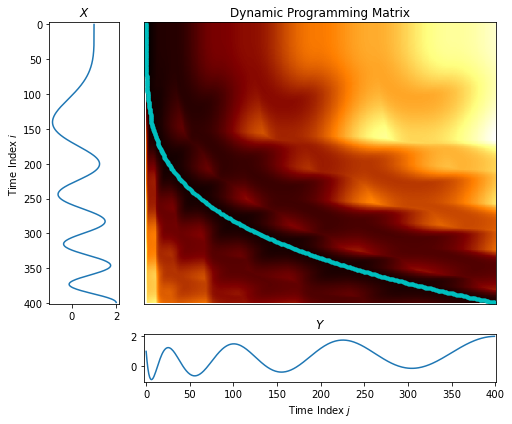

In [2]:
def drawLineColored(idx, x, C):
    for i in range(len(x)-1):
        plt.plot(idx[i:i+2], x[i:i+2], c=C[i, :])


#Make dynamic time warping example
np.random.seed(100)
t1 = np.linspace(0, 1, 400)
t1 = t1
t2 = np.sqrt(t1)
t1 = t1**2
N = len(t1)

X = np.cos(8*np.pi*t1) + t1
Y = np.cos(8*np.pi*t2) + t2

(D, backpointers, involved) = dtw(X, Y)
involved = involved[1::, 1::]
[J, I] = np.meshgrid(np.arange(involved.shape[1]), np.arange(involved.shape[0]))
J = J[involved == 1]
I = I[involved == 1]
c = plt.get_cmap('Spectral')
C1 = c(np.array(np.round(255*np.arange(N)/float(N)), dtype=np.int32))
C1 = C1[:, 0:3]
idx = np.argsort(-involved, 0)[0, :]
C2 = c(np.array(np.round(255*idx/float(N)), dtype=np.int32))
C2 = C2[:, 0:3]


fac = 0.6
left_lim = -3
plt.figure(figsize=(fac*14, fac*10))

plt.subplot2grid((5, 6), (0, 0), rowspan=4)
plt.plot(X, np.arange(X.size))
plt.ylim([D.shape[1], left_lim])
plt.title("$X$")
plt.ylabel("Time Index $i$")

plt.subplot2grid((5, 6), (0, 1), rowspan=4, colspan=4)
plt.imshow(D[1::, 1::], interpolation = 'nearest', cmap=plt.get_cmap('afmhot'), aspect = 'auto')
plt.plot(J, I, 'c.')
plt.xlim([left_lim, D.shape[1]])
plt.ylim([D.shape[0], -1])
plt.xticks([])
plt.yticks([])
plt.title("Dynamic Programming Matrix")

plt.subplot2grid((5, 6), (4, 1), colspan=4)
plt.plot(Y)
plt.xlim([left_lim, D.shape[1]])
plt.title("$Y$")
plt.xlabel("Time Index $j$")
plt.tight_layout()

plt.savefig("DTWExample.svg", bbox_inches='tight')